### Get a house with a full set of sensor info

In [3]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API/')

In [4]:
import os

In [5]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

In [6]:
from IdealMetadataInterface import IdealMetadataInterface

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import plotly.graph_objects as go


In [9]:
import datetime

In [10]:
folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
mdi = IdealMetadataInterface(folder_path)  

##### I want to be able to see all columns in a row

In [11]:
pd.set_option('display.max_columns', None)

#### make a DF with just the electric appliances in it

In [87]:
def df_appliance(homeid):
    folder_path_appliances = '/Users/barry/CodeAcademy/Ideal_dataset/room_and_appliance_sensors/sensordata'
    ideal_appliances = IdealDataInterface(folder_path_appliances)
    view_df = ideal_appliances.view(homeid = homeid) #will allow us to get the sensorids
    df = pd.DataFrame() #creat an empty dataframe to store the electric info
    sensor_list = list(view_df[view_df.category == 'electric-appliance'].sensorid) #appliance sensor id's for the provided house
    if len(sensor_list) > 0: #DF only gets populated if there are monitored appliances
        electrics_appliance_info = ideal_appliances.get(sensorid = sensor_list) #appliance info as a list with extra infor
        for appliance in electrics_appliance_info: #cycle through the list importing it to the dataframe
            df[appliance['subtype']] = appliance['readings']
        for sub_appliance in electrics_appliance_info:
            df[sub_appliance['subtype']] = sub_appliance['readings']
    else:
        print('no monitored appliances')
    try:
        df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df = df.fillna(0) # get rid of the NaN values
    except:
        pass
    return df
df_appliance(169)

Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,dishwasher,washingmachinetumbledrier,vacuumcleaner,electricheater,toaster,other,microwave,fridgefreezer,grill
time,,,,,,,,,
2017-10-25 14:00:00,496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-10-25 15:00:00,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-25 16:00:00,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-25 17:00:00,3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2017-10-25 18:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-06-10 16:00:00,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-10 17:00:00,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-10 18:00:00,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lets get the main electric data

In [13]:
def df_dwelling(homeid):
    folder_path_dwelling = '/Users/barry/CodeAcademy/Ideal_dataset/sensordata'
    ideal_dwelling = IdealDataInterface(folder_path_dwelling)
    sensor_list = list(ideal_dwelling.view(homeid = homeid).sensorid)
    df_dwelling = pd.DataFrame() #creat an empty dataframe to store the electric info
    dwelling_info = ideal_dwelling.get(sensorid = sensor_list)
    if len(dwelling_info) > 0:
        for sensor in dwelling_info:
            df_dwelling[sensor['subtype']] = sensor['readings']
    else:
        print('no relevant dwelling sensors')
    try:
        df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df_dwelling = df_dwelling.fillna(0) # get rid of the NaN values
    except:
        pass
    return df_dwelling
    



In [14]:
def weather_getter(homeid): 
    folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
    mdi = IdealMetadataInterface(folder_path)     
    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    weather_location = home_info.location.iloc[0]
    print(weather_location)
    if weather_location == 'Edinburgh':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/edinburgh_weather.csv')
        
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Midlothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/midlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'WestLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/westlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'EastLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/eastlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Fife':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/kirkcaldy_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    

    else:
        print('weather_location_wrong')
    return weather_csv



In [15]:
weather_getter(100)

Midlothian


,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°)
time,,,,,
2016-06-01 00:00:00,9.7,90,2,10.7,40
2016-06-01 01:00:00,9.4,90,1,9.4,40
2016-06-01 02:00:00,9.0,90,1,8.7,42
2016-06-01 03:00:00,8.6,91,1,9.2,45
2016-06-01 04:00:00,8.4,91,1,9.5,37
...,...,...,...,...,...
2018-07-30 19:00:00,13.9,93,61,2.6,34
2018-07-30 20:00:00,14.0,95,3,6.9,219
2018-07-30 21:00:00,14.6,88,51,9.3,234


### combining my DFs

In [93]:
def df_combined(homeid):
    df_app = df_appliance(homeid)
    df_dw = df_dwelling(homeid)
    df_weather = weather_getter(homeid)
    df_combined = pd.concat([df_app, df_dw], axis = 1)
    merged_df = df_combined.join(df_weather, how = 'inner')
    
    electric_appliances = ['dehumidifier','dishwasher',  'fridgefreezer', 'freezer', 'fridge',  'kettle',
                            'washingmachine', 'kettle', 'vacuumcleaner', 'microwave',  'shower', 'dehumidifier', 'vacuumcleaner', 'electric-combined']

    for val in electric_appliances:
        if val in merged_df.columns:
            merged_df[val] = merged_df[val].apply(lambda x: x/3600)
            merged_df[val] = merged_df[val].round(2)
    
    #merged_df['electric-combined'] = merged_df['electric-combined'].round(2)
    merged_df['electric_combined_1h_forecast'] = merged_df['electric-combined'].shift(-1)
    merged_df['day'] = merged_df.index.weekday
    merged_df['hour']= merged_df.index.hour
    if 'mains' in merged_df.columns:
        first_non_zero = merged_df['mains'].ne(0).idxmax()
        merged_df = merged_df.loc[first_non_zero:]
    else:
        pass
    merged_df = merged_df.iloc[5:]
    first_non_zero = merged_df['electric-combined'].ne(0).idxmax()
    # I need my measurements to be in Wh so i need to multiply them by 3600


    merged_df['electric_combined_1W_lagged'] = merged_df['electric-combined'].shift(168)

    merged_df = merged_df.loc[first_non_zero:]

    col_to_move = merged_df.pop('electric-combined')
    merged_df['electric-combined'] = col_to_move


    col_to_move = merged_df.pop('electric_combined_1h_forecast')
    merged_df['electric_combined_1h_forecast'] = col_to_move

    if os.path.exists(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv'):
        print(f'file already exists for {homeid}')
    else:
        merged_df.to_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')



    

    return merged_df

In [94]:
df_combined(67)

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh


,hot-water-cold-pipe,central-heating-flow,central-heating-return,gas,hot-water-hot-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2016-12-05 15:00:00,81645,0.0,0.0,0.0,85656,2.5,93,2,7.2,72,0,15,NaN,24.31,28.19
2016-12-05 16:00:00,94390,0.0,0.0,0.0,96774,1.4,96,2,8.5,78,0,16,NaN,28.19,77.85
2016-12-05 17:00:00,83725,95441.0,66050.0,0.0,111048,0.4,96,2,7.3,81,0,17,NaN,77.85,110.99
2016-12-05 18:00:00,86380,16032.0,11075.0,0.0,107884,0.3,96,2,6.9,81,0,18,NaN,110.99,91.89
2016-12-05 19:00:00,88190,0.0,0.0,0.0,118260,0.6,97,1,7.2,90,0,19,NaN,91.89,129.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-21 03:00:00,48125,0.0,0.0,0.0,48839,7.3,80,0,19.5,272,3,3,21.17,25.37,21.59
2018-06-21 04:00:00,47820,0.0,0.0,0.0,48502,7.1,80,0,20.9,273,3,4,31.12,21.59,30.40
2018-06-21 05:00:00,47430,0.0,0.0,0.0,48267,7.7,77,0,21.3,275,3,5,94.27,30.40,13.80


# to get the list of enhanced houses only

In [17]:
from IdealMetadataInterface import IdealMetadataInterface
folder_path2 = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
metadata = IdealMetadataInterface(folder_path2)
full_list = metadata.metadata.homes['home']
enhanced_houses = list(full_list[full_list.install_type == 'enhanced'].homeid)

In [18]:
display(list(enhanced_houses))

[61,
 62,
 63,
 65,
 73,
 90,
 96,
 106,
 105,
 136,
 128,
 139,
 140,
 145,
 146,
 168,
 169,
 171,
 162,
 175,
 208,
 212,
 225,
 228,
 227,
 231,
 238,
 242,
 249,
 255,
 262,
 264,
 263,
 266,
 268,
 259,
 276,
 311,
 328]

In [81]:
for house in enhanced_houses[:3]:
    df_combined(house)

Found entries for 4824 sensor readings.
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 63


In [20]:
#df_combined(106)

In [21]:
#df_combined(107)

In [22]:
df_106 = df_combined(300)


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.
Edinburgh


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


In [23]:
display(df_106.head())

,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-02-21 19:00:00,87230,69435,15730.0,23026.0,0.0,3.5,77,2,10.0,159,2,19,NaN,0.01,0.01
2018-02-21 20:00:00,125571,103010,5000.0,7118.0,0.0,3.2,77,2,12.2,166,2,20,NaN,0.01,0.01
2018-02-21 21:00:00,101350,84950,0.0,0.0,0.0,2.7,81,1,13.8,171,2,21,NaN,0.01,0.00
2018-02-21 22:00:00,129391,107245,0.0,0.0,0.0,2.3,84,0,14.6,170,2,22,NaN,0.00,0.00
2018-02-21 23:00:00,106009,88750,0.0,0.0,0.0,1.8,85,0,14.6,170,2,23,NaN,0.00,0.00


In [24]:
df_106.head(10)

,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-02-21 19:00:00,87230,69435,15730.0,23026.0,0.0,3.5,77,2,10.0,159,2,19,NaN,0.01,0.01
2018-02-21 20:00:00,125571,103010,5000.0,7118.0,0.0,3.2,77,2,12.2,166,2,20,NaN,0.01,0.01
2018-02-21 21:00:00,101350,84950,0.0,0.0,0.0,2.7,81,1,13.8,171,2,21,NaN,0.01,0.00
2018-02-21 22:00:00,129391,107245,0.0,0.0,0.0,2.3,84,0,14.6,170,2,22,NaN,0.00,0.00
2018-02-21 23:00:00,106009,88750,0.0,0.0,0.0,1.8,85,0,14.6,170,2,23,NaN,0.00,0.00
2018-02-22 00:00:00,83656,69105,0.0,0.0,0.0,1.8,83,0,15.5,175,3,0,NaN,0.00,0.00
2018-02-22 01:00:00,76721,62185,0.0,0.0,0.0,1.6,83,0,15.9,176,3,1,NaN,0.00,0.00
2018-02-22 02:00:00,57559,46830,0.0,0.0,0.0,1.3,83,0,15.5,180,3,2,NaN,0.00,0.00
2018-02-22 03:00:00,0,0,0.0,0.0,0.0,0.9,84,0,14.8,179,3,3,NaN,0.00,0.00


In [25]:
df_106.tail()

,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-06-19 07:00:00,0,0,0.0,0.0,0.0,12.0,61,2,25.4,263,1,7,0.0,0.0,0.0
2018-06-19 08:00:00,18016,13760,0.0,0.0,0.0,12.6,57,3,23.0,261,1,8,0.0,0.0,0.0
2018-06-19 09:00:00,75597,58220,0.0,0.0,0.0,13.2,54,3,22.1,251,1,9,0.0,0.0,0.0
2018-06-19 10:00:00,74816,57455,0.0,0.0,0.0,13.2,54,3,22.7,247,1,10,0.0,0.0,0.0
2018-06-19 11:00:00,53623,41205,0.0,0.0,0.0,13.5,54,3,22.3,252,1,11,0.0,0.0,NaN


### Lets have  a look at the DF to see if it accords to expectations

In [26]:
df_106.head()




,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-02-21 19:00:00,87230,69435,15730.0,23026.0,0.0,3.5,77,2,10.0,159,2,19,NaN,0.01,0.01
2018-02-21 20:00:00,125571,103010,5000.0,7118.0,0.0,3.2,77,2,12.2,166,2,20,NaN,0.01,0.01
2018-02-21 21:00:00,101350,84950,0.0,0.0,0.0,2.7,81,1,13.8,171,2,21,NaN,0.01,0.00
2018-02-21 22:00:00,129391,107245,0.0,0.0,0.0,2.3,84,0,14.6,170,2,22,NaN,0.00,0.00
2018-02-21 23:00:00,106009,88750,0.0,0.0,0.0,1.8,85,0,14.6,170,2,23,NaN,0.00,0.00


In [27]:
df_106.tail()

,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-06-19 07:00:00,0,0,0.0,0.0,0.0,12.0,61,2,25.4,263,1,7,0.0,0.0,0.0
2018-06-19 08:00:00,18016,13760,0.0,0.0,0.0,12.6,57,3,23.0,261,1,8,0.0,0.0,0.0
2018-06-19 09:00:00,75597,58220,0.0,0.0,0.0,13.2,54,3,22.1,251,1,9,0.0,0.0,0.0
2018-06-19 10:00:00,74816,57455,0.0,0.0,0.0,13.2,54,3,22.7,247,1,10,0.0,0.0,0.0
2018-06-19 11:00:00,53623,41205,0.0,0.0,0.0,13.5,54,3,22.3,252,1,11,0.0,0.0,NaN


In [28]:
df_106.sample(20)

,central-heating-flow,central-heating-return,hot-water-cold-pipe,hot-water-hot-pipe,gas,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2018-04-09 16:00:00,145214,119690,0.0,0.0,316.0,10.5,89,53,10.0,60,0,16,0.00,0.00,0.01
2018-03-19 05:00:00,106436,88040,585.0,585.0,0.0,1.9,74,71,27.7,51,0,5,0.00,0.00,0.00
2018-04-24 07:00:00,0,0,0.0,0.0,0.0,7.9,76,1,29.8,245,1,7,0.00,0.00,0.00
2018-04-25 20:00:00,122510,105230,0.0,0.0,0.0,7.1,77,1,21.9,240,2,20,0.01,0.00,0.00
2018-06-06 05:00:00,93343,76765,46840.0,83929.0,0.0,8.9,87,3,7.9,43,2,5,0.00,0.00,0.00
2018-04-03 05:00:00,152567,125780,0.0,0.0,1896.0,2.2,95,71,22.2,54,1,5,0.00,0.00,0.00
2018-02-28 16:00:00,116784,98160,7875.0,11746.0,0.0,-3.7,78,71,20.6,95,2,16,NaN,0.00,0.01
2018-06-05 06:00:00,79679,66965,0.0,0.0,0.0,9.8,80,2,14.7,59,1,6,0.00,0.00,0.00
2018-05-24 05:00:00,140180,115620,0.0,0.0,316.0,7.2,92,2,4.3,85,3,5,0.00,0.00,0.00


In [29]:
list_home_ids = ['100', '101', '102', '105', '106', '107', '109', '110', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '129', '133', '134', '135', '136', '137', '138', '139', '140', '141', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '197', '199', '200', '201', '202', '203', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '218', '219', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '313', '315', '316', '317', '318', '319', '320', '321', '322', '323', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '47', '59', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '88', '89', '90', '91', '92', '93', '94', '96', '97', '98', '99']
list_home_ids =[int(i) for i in list_home_ids]
list_home_ids = sorted(list_home_ids)

In [30]:
print(list_home_ids)

[47, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284

In [31]:
still_to_do =[224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335]

In [32]:
print(len(list_home_ids))

255


In [96]:
count = 0
for val in list_home_ids:
    print(count)
    df_combined(val)
    count += 1
    print(val)

0
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
47
1
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
59
2
Found entries for 4824 sensor readings.
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
61
3
Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
62
4
Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
63
5
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
64
6
Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
65
7
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
66
8
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 67
67
9
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
68
10
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
69
11
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
70
12
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Midlothian
71
13
Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/3469210269.py:16: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [34]:
df_47 = df_combined(47)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.
Edinburgh


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


In [35]:
df_47.head()

,hot-water-hot-pipe,gas,central-heating-return,central-heating-flow,hot-water-cold-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
time,,,,,,,,,,,,,,,
2016-08-10 21:00:00,61770,0.0,0.0,0.0,60900,12.4,93,53,20.5,252,2,21,NaN,0.01,0.01
2016-08-10 22:00:00,86519,0.0,0.0,0.0,58365,12.1,94,53,19.8,245,2,22,NaN,0.01,0.00
2016-08-10 23:00:00,67534,0.0,0.0,0.0,62480,12.0,95,53,19.3,241,2,23,NaN,0.00,0.00
2016-08-11 00:00:00,64316,0.0,0.0,0.0,62580,12.1,95,53,19.2,240,3,0,NaN,0.00,0.00
2016-08-11 01:00:00,63992,0.0,0.0,0.0,63000,12.3,95,51,19.5,242,3,1,NaN,0.00,0.00


#### Need to check the metrics are consistent

#### Lets get the information from the home.csv

In [36]:
def home_info(homeid):

    #print('home_info')

    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    #display(home_info)

    appliance_list = ['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other']

    df_appliance = pd.DataFrame([0]*len(appliance_list), index=appliance_list).T
    appliance_info = mdi.metadata.appliances['appliance']
    appliance_info = appliance_info[appliance_info.homeid == homeid]
    for val in df_appliance.columns:
        if val in list(appliance_info.appliancetype):
            df_appliance[val]= 1
        else:
            df_appliance[val] = 0
    #display(df_appliance)


    #print('weather center')
    location_info = mdi.metadata.locations['location']
    location = home_info.location.iloc[0]
    location_info = location_info[location_info.locationid == location]
    #display(location_info)


    #print('people info')
    people_info = mdi.metadata.people['person']
    people_info = people_info[people_info.homeid == homeid].reset_index()
    #display(people_info)

    #print('tariff info')
    df_tariff = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/tariff.csv')
    #display(df_tariff[(df_tariff.homeid == homeid) & (df_tariff.energytype == 'electricity')])

    #print('meter reading')
    df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
    #display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])    

    room_info = mdi.metadata.rooms['room']
    room_info = room_info[room_info.homeid == homeid]
    #display(room_info[room_info.homeid == homeid])

    room_info_condensed = pd.DataFrame({'number_of_rooms': [len(room_info)]})
    room_info_condensed['sqm'] = room_info.floorarea.sum()
    #display(room_info_condensed)
    df_all = pd.merge(home_info, df_appliance, left_index=True, right_index=True) 
    df_all = pd.merge(df_all, location_info, left_index=True, right_index=True)
    df_all = pd.merge(df_all, people_info, left_index=True, right_index=True)


    display(df_all)
    display(df_all.shape)




home_info(106)

,index_x,homeid_x,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,hometype,equivalised_income,occupancy,urban_rural_class,urban_rural_name,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying,fridgefreezer,grill,toaster,kettle,electricoven,washingmachine,freezer,fridge,microwave,dishwasher,vacuumcleaner,electrichob,washingmachinetumbledrier,electricshower,electricheater,tumbledrier,dehumidifier,other,locationid,weather_centre,index_y,personid,homeid_y,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,43,106,enhanced,Edinburgh,1,13/04/2017 03:00,17/05/2017 03:00,14/06/2018 11:30,enhanced_20170614,"£32,400 to £37,799",enhanced,flat,above_median,single,1,Large Urban Areas,1991-1995,NaN,Don't own,Don't own,2,5,2nd,Yes - shared with neighbours,No,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,Edinburgh,Edinburgh,102,723,106,1,NaN,Female,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",21.0,1,2017-04-13,0


(1, 59)

In [37]:
df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])



,homeid,provenance,provenancedetail,energytype,date,reading
475,106,723,all_web_end,electricity,2018-06-15,20851.0


In [38]:

appliance_info = mdi.metadata.appliances['appliance'][mdi.metadata.appliances['appliance'].powertype == 'electric'].appliancetype.unique()
display(appliance_info)


array(['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other'], dtype=object)

In [39]:
mdi.metadata.locations.location

,locationid,weather_centre
0,Edinburgh,Edinburgh
1,WestLothian,Livingston
2,Midlothian,Penicuik
3,EastLothian,North Berwick
4,Fife,Kirkcaldy


In [40]:
df_106 = df_dwelling(106)

Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


In [41]:
df_106.head(1)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0


In [42]:
start_date = pd.to_datetime('2017-06-01')
end_date = pd.to_datetime('2018-06-01')
df_106_year = df_106.loc[start_date:end_date]

In [43]:
df_106_year.head(10)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-06-01 00:00:00,59406,0.0,0.0,478.0,5721.0,5.0,29170.0,28803.0,28810.0
2017-06-01 01:00:00,59607,0.0,0.0,477.0,6098.0,7.0,29123.0,0.0,0.0
2017-06-01 02:00:00,58265,0.0,0.0,474.0,6454.0,11.0,30653.0,0.0,0.0
2017-06-01 03:00:00,58016,0.0,0.0,458.0,6113.0,9.0,29147.0,0.0,0.0
2017-06-01 04:00:00,58418,0.0,0.0,485.0,6142.0,8.0,28649.0,0.0,0.0
2017-06-01 05:00:00,54600,0.0,0.0,19659.0,26465.0,5.0,109881.0,0.0,0.0
2017-06-01 06:00:00,69912,0.0,0.0,439.0,8150.0,1.0,41729.0,0.0,0.0
2017-06-01 07:00:00,66082,0.0,0.0,473.0,8367.0,3.0,42592.0,0.0,0.0
2017-06-01 08:00:00,60445,0.0,0.0,478.0,6531.0,3.0,30883.0,0.0,0.0


In [44]:
df_106_year.index

DatetimeIndex(['2017-06-01 00:00:00', '2017-06-01 01:00:00',
               '2017-06-01 02:00:00', '2017-06-01 03:00:00',
               '2017-06-01 04:00:00', '2017-06-01 05:00:00',
               '2017-06-01 06:00:00', '2017-06-01 07:00:00',
               '2017-06-01 08:00:00', '2017-06-01 09:00:00',
               ...
               '2018-05-31 15:00:00', '2018-05-31 16:00:00',
               '2018-05-31 17:00:00', '2018-05-31 18:00:00',
               '2018-05-31 19:00:00', '2018-05-31 20:00:00',
               '2018-05-31 21:00:00', '2018-05-31 22:00:00',
               '2018-05-31 23:00:00', '2018-06-01 00:00:00'],
              dtype='datetime64[ns]', name='time', length=8761, freq='h')

In [45]:
import matplotlib.dates as mdates


In [46]:
df_106.head()

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


In [47]:
def hourly_consumption(df, homeid =None):
    fig, ax = plt.subplots(figsize = (35, 5))
    sns.lineplot(data = df, x = df.index, y = 'electric-combined', ax = ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.legend(['mains'])
    fig.suptitle(f'Hourly electricity consumption for home {homeid}')
        # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    # Draw a horizontal line at the average consumption
    ax.axhline(y=average_consumption, color='r', linestyle='--')



    plt.show()

    average_consumption = df['electric-combined'].mean()
    display(f'average daily consumption: {average_consumption}')


In [48]:
def hourly_consumption2(df, homeid=None):
    # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    fig = go.Figure()

    # Add line plot
    fig.add_trace(go.Scatter(x=df.index, y=df['electric-combined'], mode='lines', name='mains'))

    # Add horizontal line at the average consumption
    fig.add_shape(type="line",
                  x0=df.index.min(), y0=average_consumption,
                  x1=df.index.max(), y1=average_consumption,
                  line=dict(color="Red", width=2, dash="dash"))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_title="Date",
        yaxis_title="Electric Combined",
        autosize=False,
        width=1000,
        height=500,
        xaxis=dict(
            tickformat="%Y-%m-%d %H:%M"  # Display x-axis labels in the format "Year-Month-Day Hour:Minute"
        )
    )

    fig.show()

    print(f'average daily consumption: {average_consumption}')

In [49]:
hourly_consumption2(df_106, 106)

average daily consumption: 45736.0476097561


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



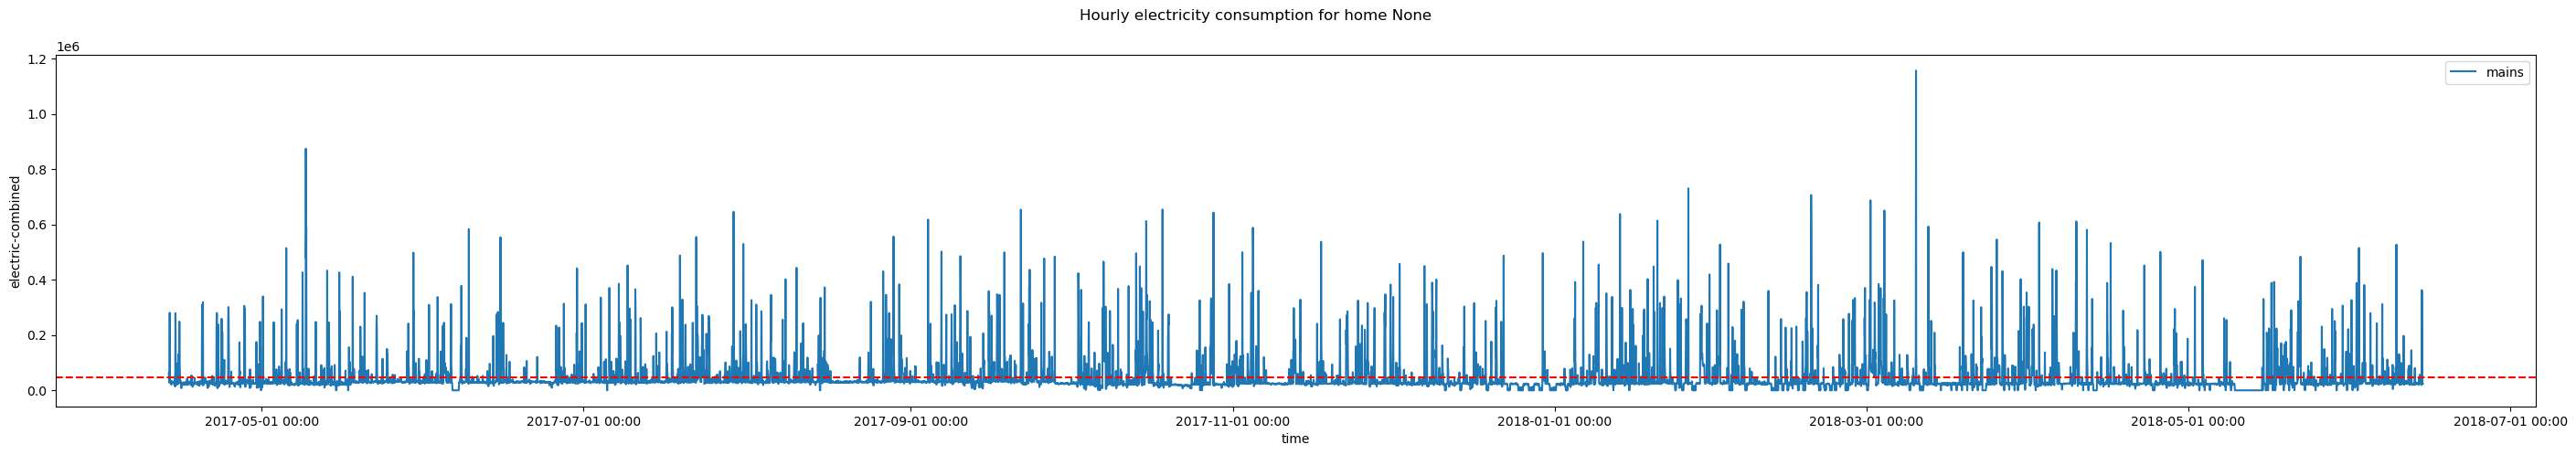

'average daily consumption: 45736.0476097561'

In [50]:
hourly_consumption(df_106)

In [51]:
def heatmap(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_data, cmap = 'Oranges')
    plt.suptitle(f'Hourly electricity consumption for home {homeid}')
    plt.show()


In [52]:

def heatmap2(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')

    fig = go.Figure(data=go.Heatmap(
                   z=pivot_data.values,
                   x=pivot_data.columns,
                   y=pivot_data.index,
                   colorscale='Oranges',
                   hovertemplate='Day: %{y}<br>Time: %{x}<br>Value: %{z}<extra></extra>'
                   ))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_nticks=36,
        width=800,
        height = 800,
        xaxis_title="Hour of the day",
        yaxis_title = 'Date')

    fig.show()

In [53]:
heatmap2(df_106)

In [54]:
#lets get a graph showing the number of hours producing
display(df_106.head())

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


In [55]:
df_106['electric-combined'].max()

1156703.0

In [56]:
def bin_builder(df):
    count_under_10000 = df[(df['electric-combined'] < 10)].gas.count()
    count_between_10000_20000 = df[(df['electric-combined'] >= 10) & (df['electric-combined'] < 20)].gas.count()
    count_between_20000_30000 = df[(df['electric-combined'] >= 20) & (df['electric-combined'] < 30)].gas.count()
    count_between_30000_40000 = df[(df['electric-combined'] >= 30) & (df['electric-combined'] < 40)].gas.count()
    count_between_40000_50000 = df[(df['electric-combined'] >= 50) & (df['electric-combined'] < 60)].gas.count()
    count_between_50000_60000 = df[(df['electric-combined'] >= 60) & (df['electric-combined'] < 70)].gas.count()
    count_between_60000_70000 = df[(df['electric-combined'] >= 80) & (df['electric-combined'] < 80)].gas.count()
    count_between_70000_80000 = df[(df['electric-combined'] >= 90) & (df['electric-combined'] < 90)].gas.count()

 
    count_over_80000 = df[(df['electric-combined'] >= 80000)].gas.count()
    bins = [count_under_10000, count_between_10000_20000, count_between_20000_30000, count_between_30000_40000, count_between_40000_50000,count_between_50000_60000,count_between_60000_70000,count_between_70000_80000, count_over_80000]
    return bins

In [57]:
# def bin_builder(df):
#     count_under_50 = df[(df['electric-combined'] < 50)].gas.count()
#     count_between_50_100 = df[(df['electric-combined'] >= 50) & (df['electric-combined'] < 100)].gas.count()
#     count_between_100_150 = df[(df['electric-combined'] >= 100) & (df['electric-combined'] < 150)].gas.count()
#     count_between_150_200 = df[(df['electric-combined'] >= 150) & (df['electric-combined'] < 200)].gas.count()
#     count_between_200_300 = df[(df['electric-combined'] >= 200) & (df['electric-combined'] < 300)].gas.count()
#     count_between_300_400 = df[(df['electric-combined'] >= 300) & (df['electric-combined'] < 400)].gas.count()
#     count_between_400_500 = df[(df['electric-combined'] >= 400) & (df['electric-combined'] < 500)].gas.count()
#     count_between_500_750 = df[(df['electric-combined'] >= 500) & (df['electric-combined'] < 750)].gas.count()
#     count_between_750_1000 = df[(df['electric-combined'] >= 750) & (df['electric-combined'] < 1000)].gas.count()
#     count_between_1000_1500 = df[(df['electric-combined'] >= 1000) & (df['electric-combined'] < 1500)].gas.count()
#     count_between_1500_2000 = df[(df['electric-combined'] >= 1500) & (df['electric-combined'] < 2000)].gas.count()
#     count_over_2000 = df[(df['electric-combined'] >= 2000)].gas.count()
#     bins = [count_under_50, count_between_50_100, count_between_100_150, count_between_150_200, count_between_200_300, count_between_300_400, count_between_400_500, count_between_500_750, count_between_750_1000, count_between_1000_1500, count_between_1500_2000, count_over_2000]
#     return bins

In [58]:
def power_hour_count(df, homeid=None):

    bins = bin_builder(df)


    counts = {
        'count_under_10': bins[0],
        'count_between_10_20': bins[1],
        'count_between_20_30': bins[2],
        'count_between_30_40': bins[3],
        'count_between_40_50': bins[4],
        'count_between_50_60': bins[5],
        'count_between_60_70': bins[6],
        'count_between_70_80':bins[7],
        'count_over_80': bins[7]
    }

    # Convert the dictionary to a pandas DataFrame
    df_counts = pd.DataFrame(list(counts.items()), columns=['Range', 'Count'])

    # Create the barplot
    sns.barplot(x='Count', y='Range', data=df_counts)
    plt.title('Number of hours where electricity consumption falls within a given range')

    for i in range(df_counts.shape[0]):
        plt.text(df_counts.Count[i], i, df_counts.Count[i], va='center')

       # Calculate the average
    avg = df_counts['Count'].mean()

    # Draw a vertical line at the average point
    plt.axvline(x=avg, color='r', linestyle='--')



    # Show the plot
    plt.show()

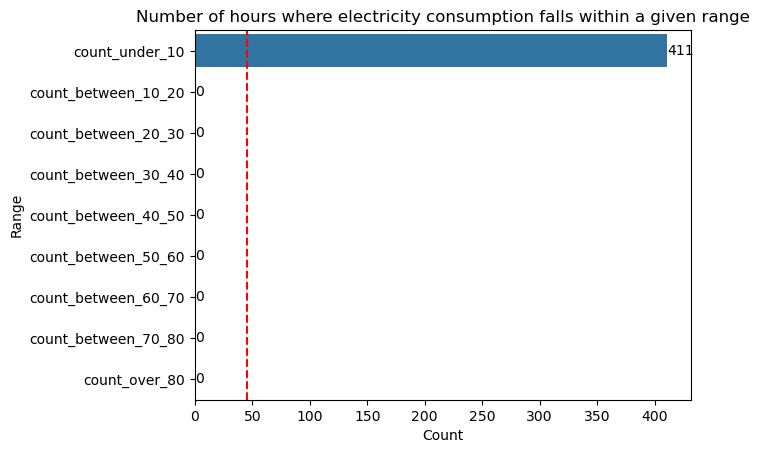

In [59]:
power_hour_count(df_106)

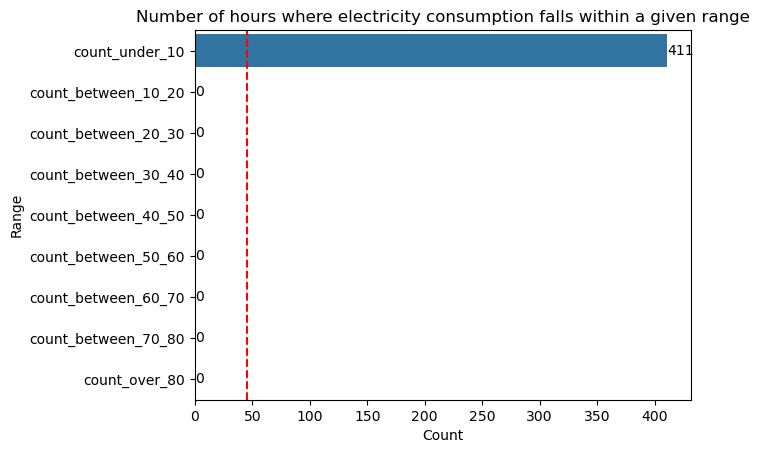

In [60]:
power_hour_count(df_106)

In [61]:
def isolate_peak(df):
    df_peak = df[df['electric-combined'] > 70000]
    return df_peak

In [62]:
df_106_peak = isolate_peak(df_106)

In [63]:
def day_consumption(df):
    #df2 = df['electric-combined'].copy()
    sns.boxplot(data = df, x = df.index.day_name(), y = 'electric-combined')
    plt.show()

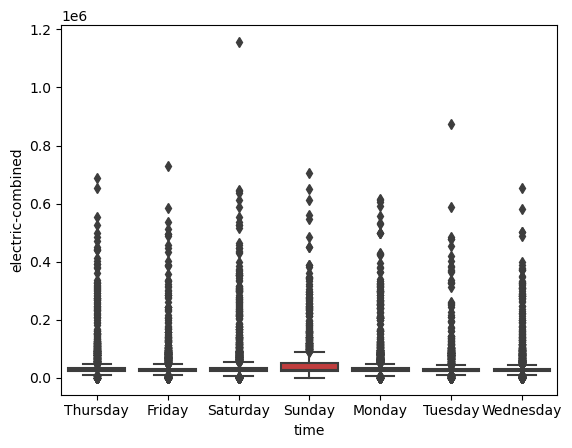

In [64]:
day_consumption(df_106)

In [65]:
def day_consumption_outliersremoved(df):
    df = df['electric-combined'].copy().reset_index()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
    sns.boxplot(data = df, x = df.time.dt.day_name(), y = 'electric-combined')
    plt.show()


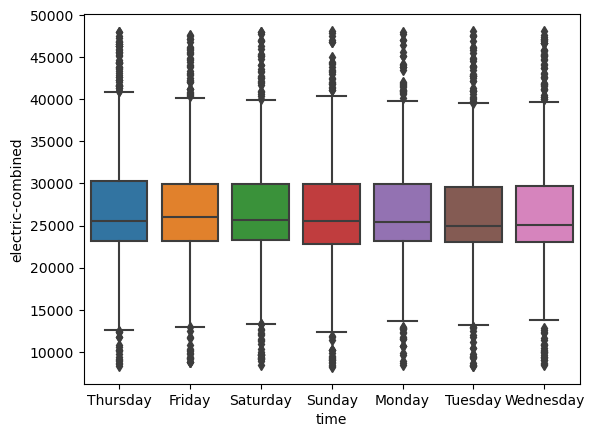

In [66]:
day_consumption_outliersremoved(df_106)

In [67]:
def hourly_consumption(df):
    display(df.head())
    df = df['electric-combined'].copy().reset_index()
    display(df.head())
    sns.boxplot(data = df, x = df.time.dt.hour, y = 'electric-combined')
    plt.show()

In [68]:
def hourly_consumption_outliersremoved(df):
    df = df['electric-combined'].copy().reset_index()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
    sns.boxplot(data = df, x = df.time.dt.hour, y = 'electric-combined')
    plt.show()


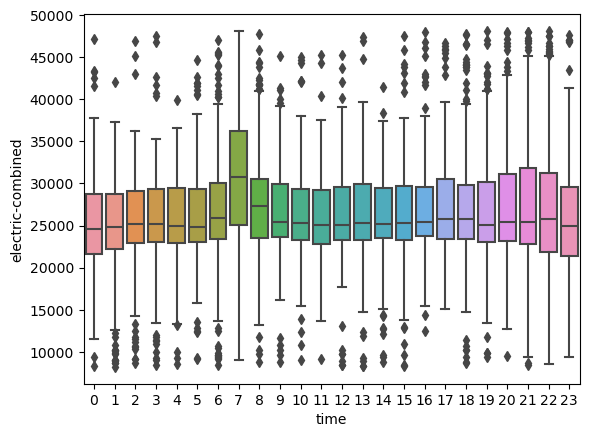

In [69]:
hourly_consumption_outliersremoved(df_106)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


,time,electric-combined
0,2017-04-13 10:00:00,57887.0
1,2017-04-13 11:00:00,66525.0
2,2017-04-13 12:00:00,27318.0
3,2017-04-13 13:00:00,70616.0
4,2017-04-13 14:00:00,280779.0


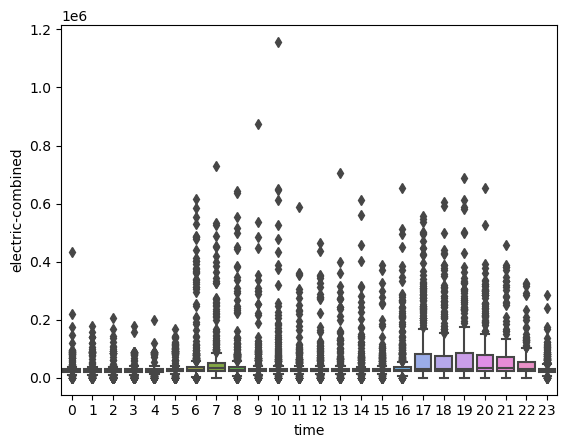

In [70]:
hourly_consumption(df_106)

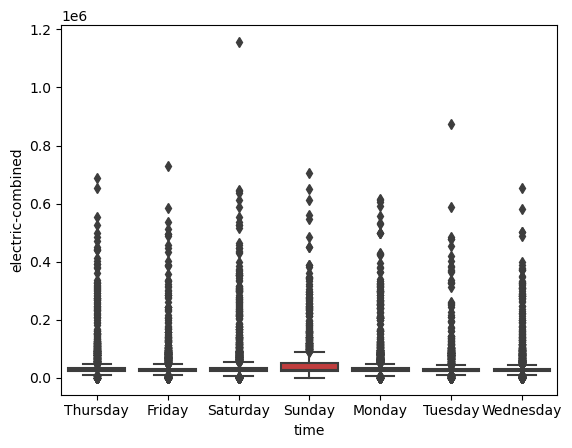

In [71]:
day_consumption(df_106)

In [72]:
def peak_season_breakdown(df, ax=None, homeid =None):
    df['season'] = df.index.to_series().dt.month%12 // 3 + 1

    season_counts = df['season'].value_counts().sort_index()

    # Calculate percentages
    season_percentages = pd.DataFrame(season_counts / df.shape[0] * 100)
    fig = season_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Season'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/159411260.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

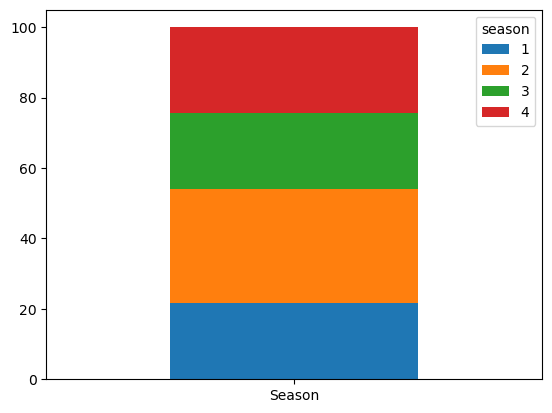

In [73]:
peak_season_breakdown(df_106_peak)

In [74]:
def peak_day_breakdown(df, ax=None, homeid=None):
    df['day_of_week'] = df.index.to_series().dt.dayofweek
    df['day_of_week'] = df.day_of_week.apply(lambda x: 'M' if x == 0 else 'T' if x == 1 else 'W' if x == 2 else 'Th' if x == 3 else 'F' if x == 4 else 'S' if x == 5 else 'Su' if x == 6 else x)

    day_of_week_counts = df['day_of_week'].value_counts().sort_index()


    # Calculate percentages
    day_of_week_percentages = pd.DataFrame(day_of_week_counts / df.shape[0] * 100)
    fig = day_of_week_percentages.T.plot(kind='bar',stacked=True, ax=ax)
    fig.set_xticklabels(['Day of week'], rotation=0)
    if ax is not None:
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
    


    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

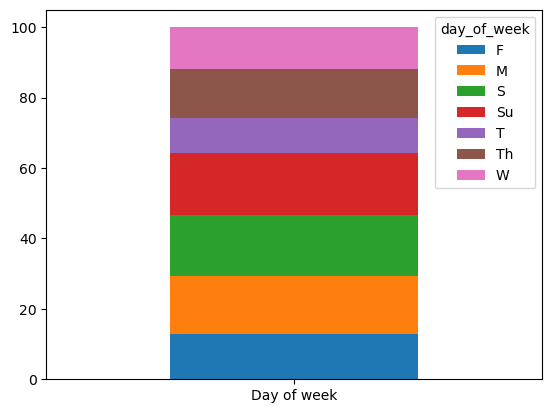

In [75]:
peak_day_breakdown(df_106_peak)

In [76]:
def peak_time_of_day(df, ax=None, homeid =None):
    def get_part_of_day(hour):
        return (
            "morning" if 5 <= hour <= 11
            else
            "afternoon" if 12 <= hour <= 17
            else
            "evening" if 18 <= hour <= 22
            else
            "night"
        )

    df['part_of_day'] = df.index.to_series().dt.hour.apply(get_part_of_day)

    part_of_day_counts = df['part_of_day'].value_counts().sort_index()

    # Calculate percentages
    part_of_day_percentages = pd.DataFrame(part_of_day_counts / df.shape[0] * 100)

    fig = part_of_day_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Time of day'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)



    return fig



In [77]:
def peak_combined_breakdown(df, homeid=None):

    fig, axs = plt.subplots(1, 3, figsize=(8, 5))
    peak_time_of_day(df, ax=axs[0])
    peak_day_breakdown(df, ax=axs[1])
    peak_season_breakdown(df, ax=axs[2])
    fig.suptitle('Peak electricity consumption breakdown')
    fig.text(0.5, 1,'hours with consumption over 1000', ha='center', va='top')
    plt.tight_layout()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2676000693.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

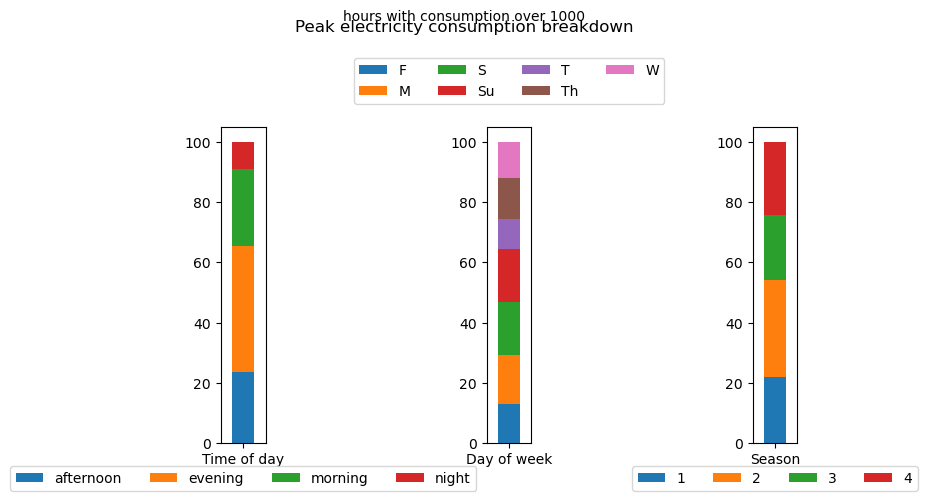

In [78]:
peak_combined_breakdown(df_106_peak)

In [79]:
def house_breakdown(homeid):
    df = df_combined(homeid)
    homeid = str(homeid)

    power_hour_count(df, homeid)
    day_consumption(df)
    day_consumption_outliersremoved(df)
    hourly_consumption2(df, homeid)
    hourly_consumption_outliersremoved(df)
    heatmap2(df, homeid)
    peak_combined_breakdown(df,homeid)
    
    
   

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.
Edinburgh


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_71040/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



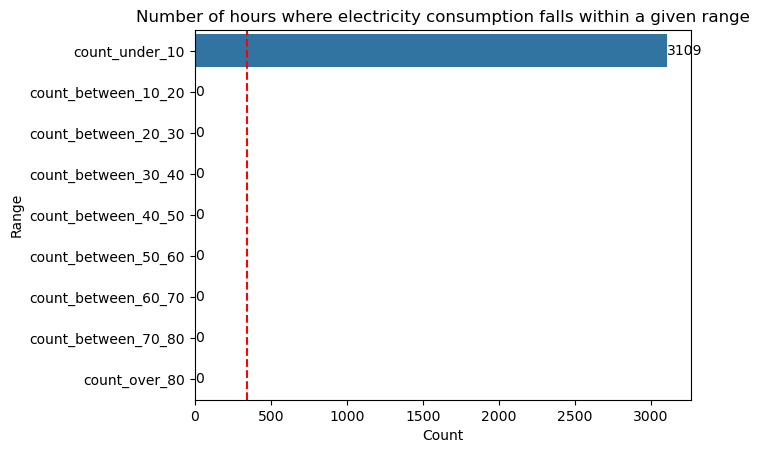

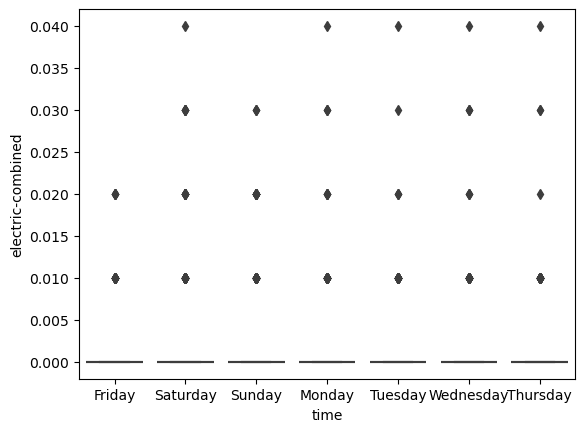

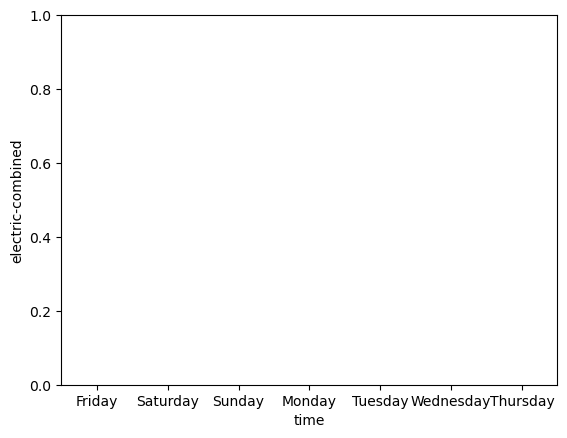

average daily consumption: 0.0014409778063686075


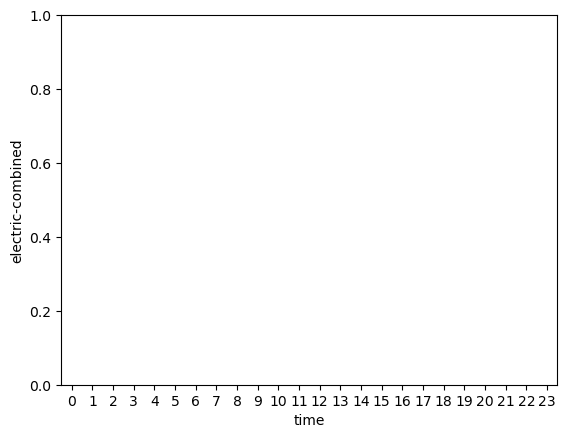

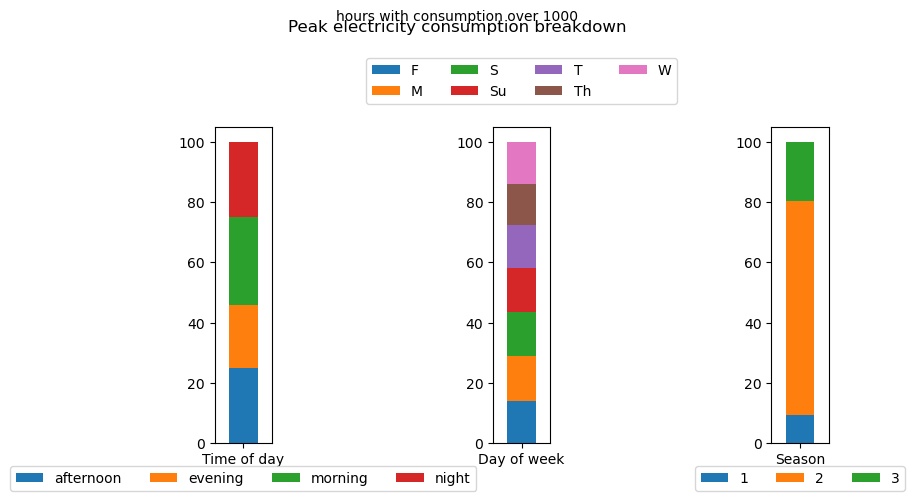

In [80]:
house_breakdown(295)